In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import quant as qt

In [3]:
qt.plot.set_plot_options()

## Nifty ETFs and Mutual Funds against Nifty 50 Index

In [4]:
schemes = qt.api.mf_list(filter=["Nifty", "50", "UTI|Navi", "Direct", "Growth"])
schemes

,schemeCode,schemeName,isinGrowth,isinDivReinvestment
15587,120716,UTI Nifty 50 Index Fund - Growth Option- Direct,INF789F01XA0,None
29231,143341,UTI Nifty Next 50 Index Fund - Direct Plan - G...,INF789FC12T1,None
33376,149039,Navi Nifty 50 Index Fund-Direct Plan-Growth,INF959L01FP2,None
33713,149447,Navi Nifty Next 50 Index Fund- Direct Plan- Gr...,INF959L01FR8,None
33961,149892,Navi Nifty Midcap 150 Index Fund Direct Plan- ...,INF959L01FX6,None
34147,150313,UTI Nifty Midcap 150 Quality 50 Index Fund - D...,INF789F1AVH8,None
35082,151471,NAVI ELSS TAX SAVER NIFTY 50 INDEX FUND - DIRE...,INF959L01GR6,None
35270,151739,UTI Nifty 500 Value 50 Index Fund - Direct Pla...,INF789F1AYN0,None
35292,151762,UTI Nifty50 Equal Weight Index Fund - Direct P...,INF789F1AYP5,None
36442,153089,UTI Nifty Midcap 150 Index Fund - Direct Plan ...,INF789F1AZO5,None


In [5]:
mf_df = pd.DataFrame.quant.mutual_fund([120716, 149039]).quant.to_returns()
mf_df.quant.first_valid_index()

asset
Navi Nifty 50 Index Fund-Direct Plan-Growth       2021-07-19
UTI Nifty 50 Index Fund - Growth Option- Direct   2013-01-03
Name: date, dtype: datetime64[ns]

In [6]:
nifty_etf = (
    pd.DataFrame.quant.ticker(["NIFTYBEES.NS", "SETFNIF50.NS"])
    .loc["2020-01-01":]
    .quant.to_returns()
)
nifty_etf

Ticker,NIFTYBEES.NS,SETFNIF50.NS
date,,
2020-01-02,0.005563,0.005330
2020-01-03,-0.003304,-0.001424
2020-01-06,-0.018040,-0.017038
2020-01-07,0.003062,0.002338
2020-01-08,-0.001565,-0.002333
...,...,...
2025-05-30,-0.002046,-0.001975
2025-06-02,-0.001331,-0.000951
2025-06-03,-0.006592,-0.007274


In [7]:
bmk = pd.DataFrame.quant.ticker("^NSEI").quant.to_returns()
bmk

Ticker,^NSEI
date,
2007-09-18,0.011469
2007-09-19,0.040946
2007-09-20,0.003212
2007-09-21,0.018957
2007-09-24,0.019566
...,...
2025-06-02,-0.001378
2025-06-03,-0.007044
2025-06-04,0.003166


In [8]:
df = pd.concat([mf_df, nifty_etf, bmk], axis=1).quant.ralign()

<Axes: title={'center': 'Cumulative Returns'}, xlabel='date'>

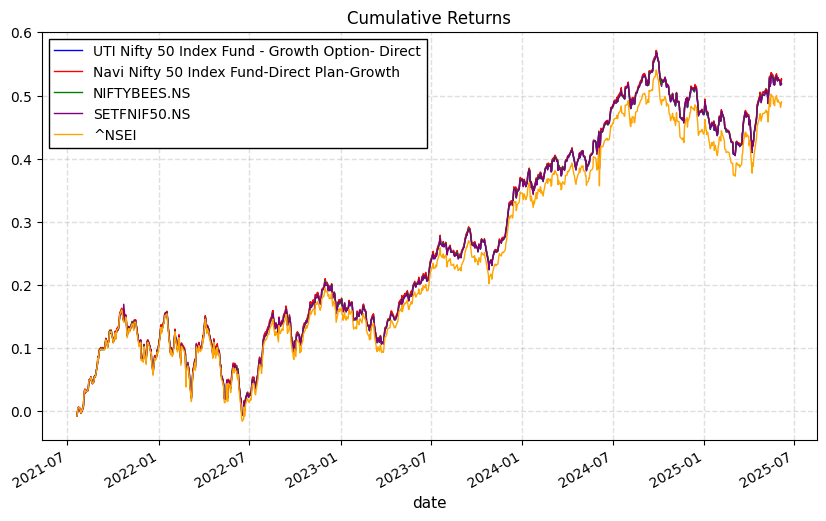

In [9]:
df.cumsum().plot(title="Cumulative Returns")

In [10]:
qt.backtest.perf_summary_table(df.drop(columns=["^NSEI"]), bmk=df[["^NSEI"]])

In [11]:
qt.backtest.perf_summary_table(df[["^NSEI"]])

<Axes: >

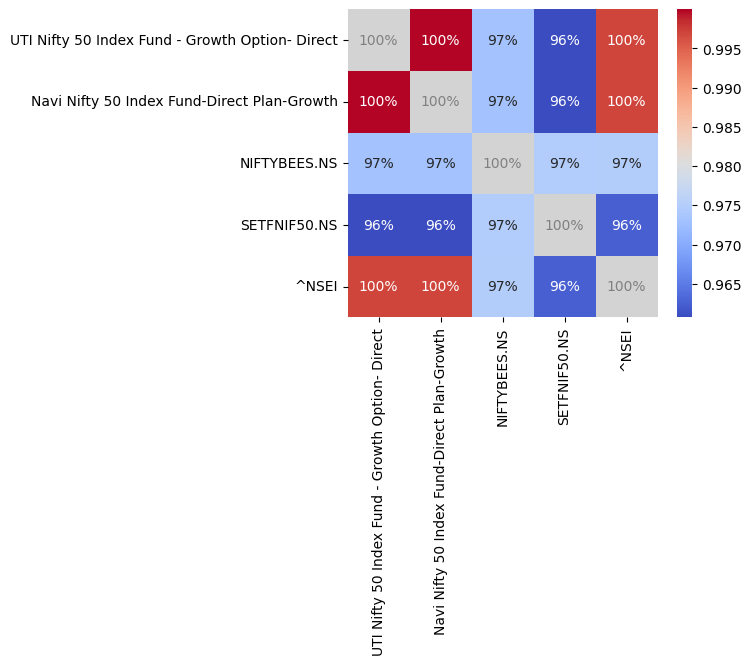

In [12]:
plt.figure(figsize=(5, 4))
qt.plot.heatmap(df.corr())

<Axes: title={'center': 'Rolling 1-year volatility'}, xlabel='date'>

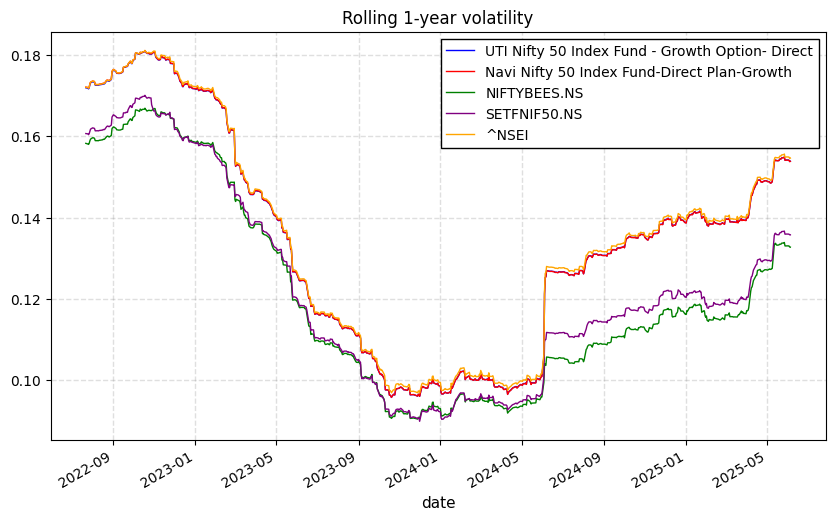

In [13]:
df.rolling(252).std().mul(252**0.5).plot(title="Rolling 1-year volatility")

<Axes: title={'center': 'Growth of Rupee'}, xlabel='date'>

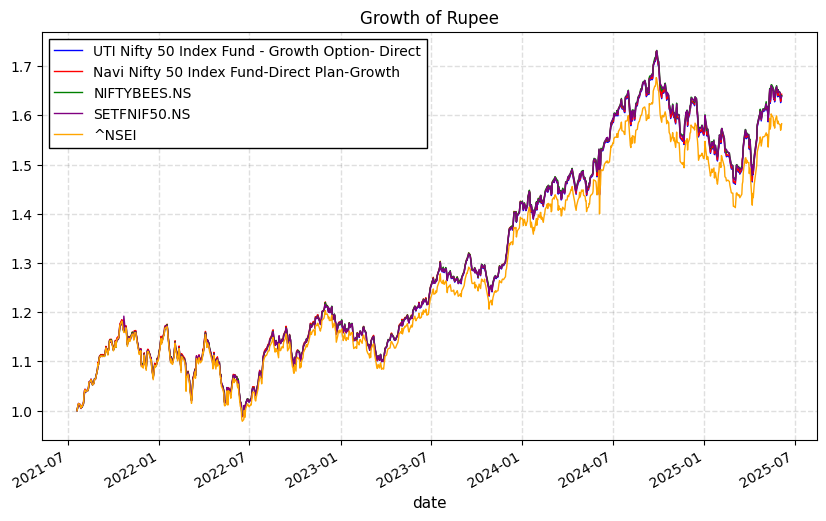

In [14]:
df.quant.to_prices().quant.rebase(1).plot(title="Growth of Rupee")

<Axes: xlabel='periods', ylabel='Variance Ratio'>

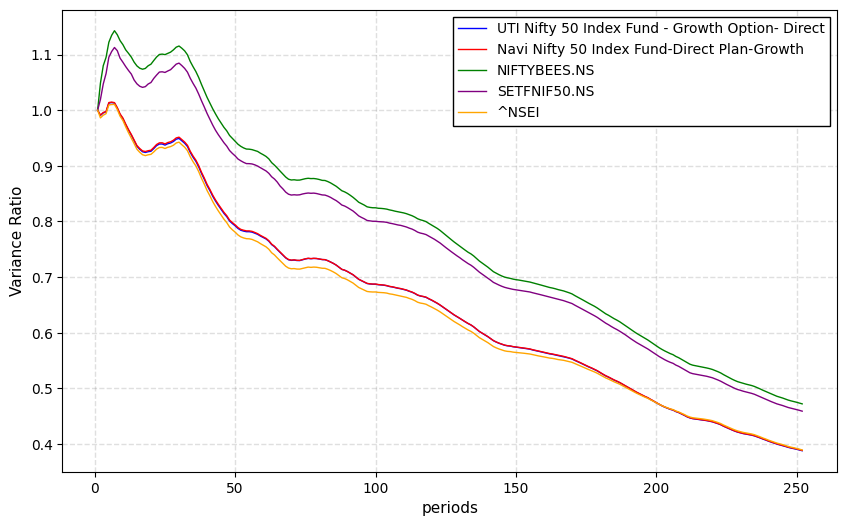

In [15]:
df.quant.variance_ratio_test().plot(ylabel="Variance Ratio", xlabel="periods")

## Junior Bees vs Nifty Bees

In [16]:
next50 = pd.DataFrame.quant.ticker(["JUNIORBEES.NS"]).quant.to_returns()

In [17]:
merged = pd.concat([df[["NIFTYBEES.NS"]], next50], axis=1).quant.ralign()
qt.backtest.perf_summary_table(merged, bmk=merged[["NIFTYBEES.NS"]])

<Axes: title={'center': 'Growth of Rupee'}, xlabel='date'>

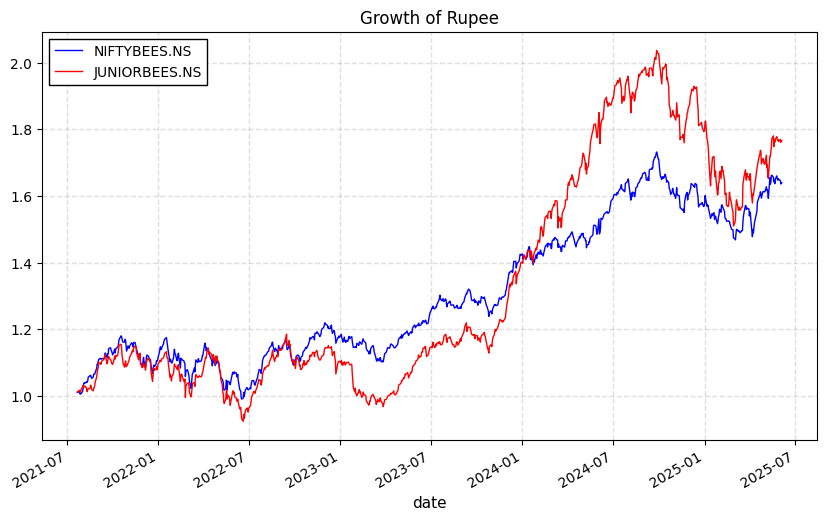

In [18]:
merged.quant.to_prices().plot(title="Growth of Rupee")

<Axes: xlabel='periods', ylabel='Variance Ratio'>

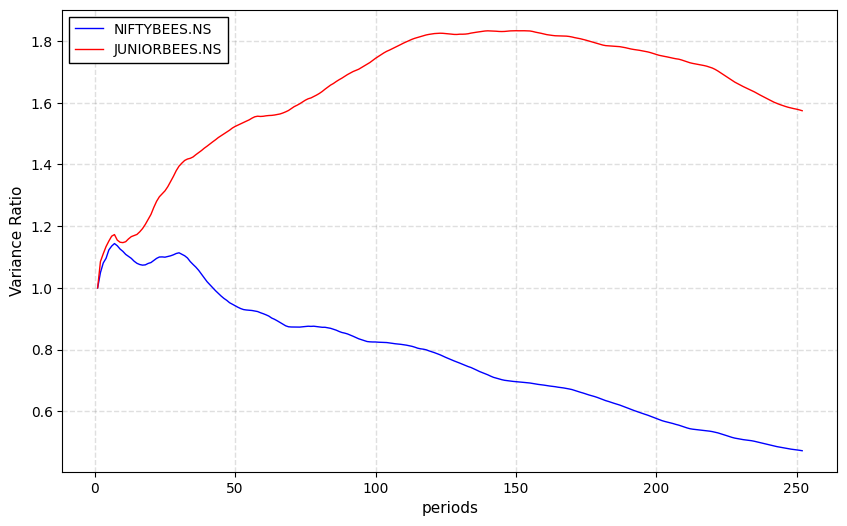

In [19]:
merged.quant.variance_ratio_test(periods=252).plot(
    ylabel="Variance Ratio", xlabel="periods"
)

# Nifty50/500 and S&P500

In [20]:
ret = (
    pd.DataFrame.quant.ticker(["^NSEI", "^CRSLDX", "^GSPC"])
    .quant.palign()
    .quant.to_returns()
    .quant.agg_returns("W")
)
ret.quant.describe()

,^NSEI,^CRSLDX,^GSPC
Start Date,2007-09-26 00:00:00,2007-09-26 00:00:00,2007-09-26 00:00:00
End Date,2025-06-04 00:00:00,2025-06-04 00:00:00,2025-06-04 00:00:00
Num Points,924,924,924
Missing Values,0,0,0
Frequency,7 days 00:00:00,7 days 00:00:00,7 days 00:00:00
Min,-0.190239,-0.186527,-0.151689
Max,0.174692,0.193851,0.113127
Mean,0.002182,0.002306,0.001764


<Axes: xlabel='Ticker', ylabel='Ticker'>

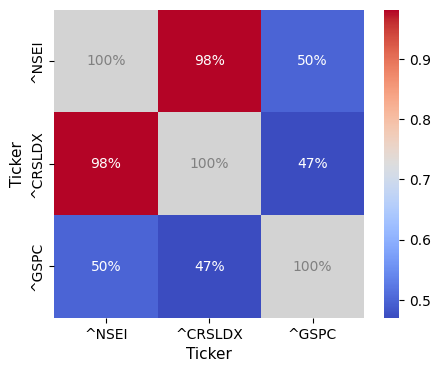

In [21]:
plt.figure(figsize=(5, 4))
qt.plot.heatmap(ret.corr())

Start date: 2007-09-26
End date: 2025-06-04


,Start Date,End Date,Drawdown
^NSEI,2008-01-09,2009-03-11,-58.97%
^CRSLDX,2008-01-09,2009-03-11,-63.92%


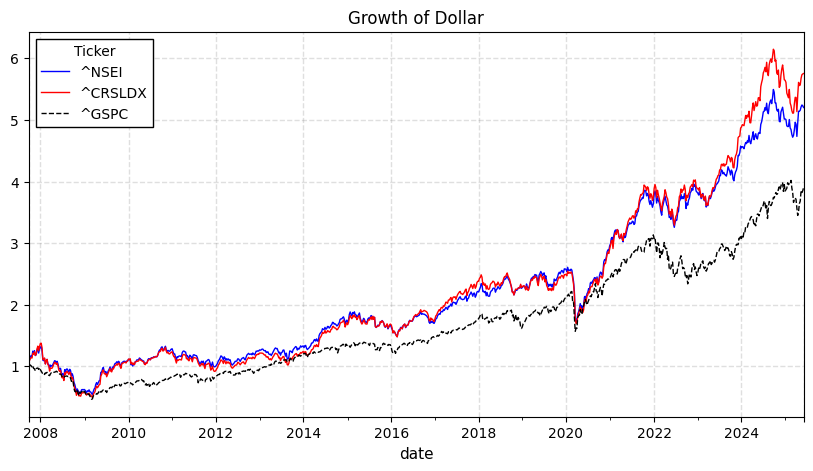

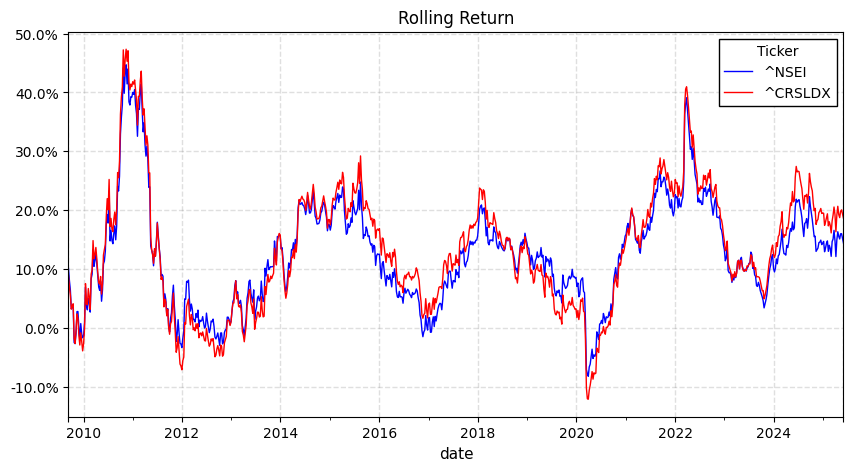

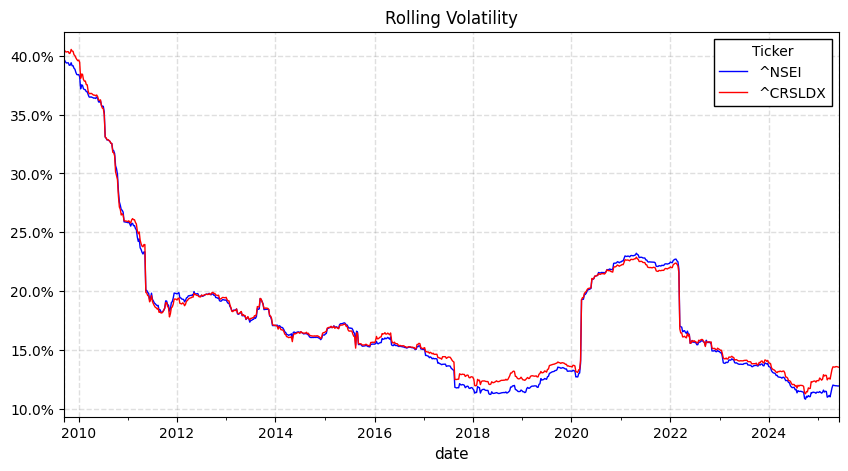

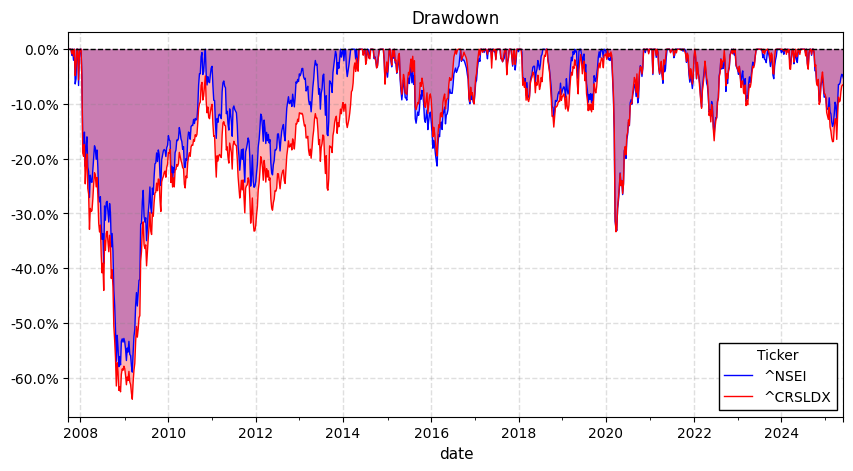

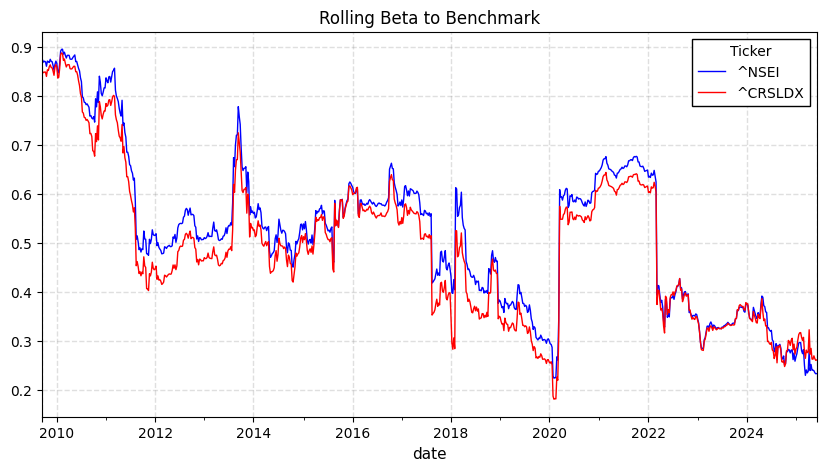

In [22]:
qt.backtest.perf_report(ret.iloc[:, :-1], bmk=ret[["^GSPC"]], yr=52, window=104)

In [23]:
ret = (
    pd.DataFrame.quant.ticker(["^CRSLDX", "^GSPC", "INR=X", "GC=F", "BZ=F"])
    .quant.palign()
    .quant.to_returns()
    .quant.agg_returns("W")
)
ret.quant.describe()

,^CRSLDX,^GSPC,INR=X,GC=F,BZ=F
Start Date,2007-08-08 00:00:00,2007-08-08 00:00:00,2007-08-08 00:00:00,2007-08-08 00:00:00,2007-08-08 00:00:00
End Date,2025-06-04 00:00:00,2025-06-04 00:00:00,2025-06-04 00:00:00,2025-06-04 00:00:00,2025-06-04 00:00:00
Num Points,931,931,931,931,931
Missing Values,0,0,0,0,0
Frequency,7 days 00:00:00,7 days 00:00:00,7 days 00:00:00,7 days 00:00:00,7 days 00:00:00
Min,-0.186527,-0.151689,-0.07273,-0.122322,-0.304834
Max,0.193851,0.113127,0.05524,0.117034,0.327405
Mean,0.00239,0.0018,0.000859,0.002046,0.001201


In [24]:
ret.iloc[:, :1].quant.factor_model(ret.iloc[:, 1:]).style.set_caption(
    "Factor Model for NSE500"
).background_gradient(cmap="Greens_r", subset=["bic"])

,Beta,Variance Contribution,Percentage Contribution
^GSPC,0.443098,0.000144,17.49%
INR=X,-0.971110,0.000125,15.28%
Residual,nan,0.000552,67.23%


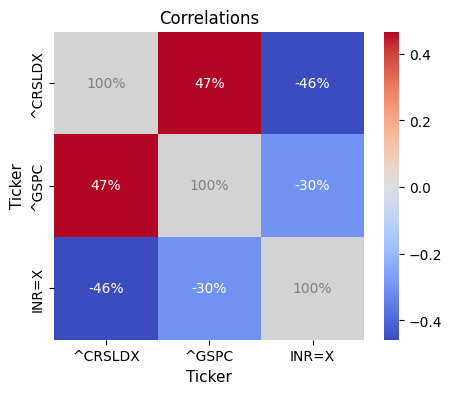

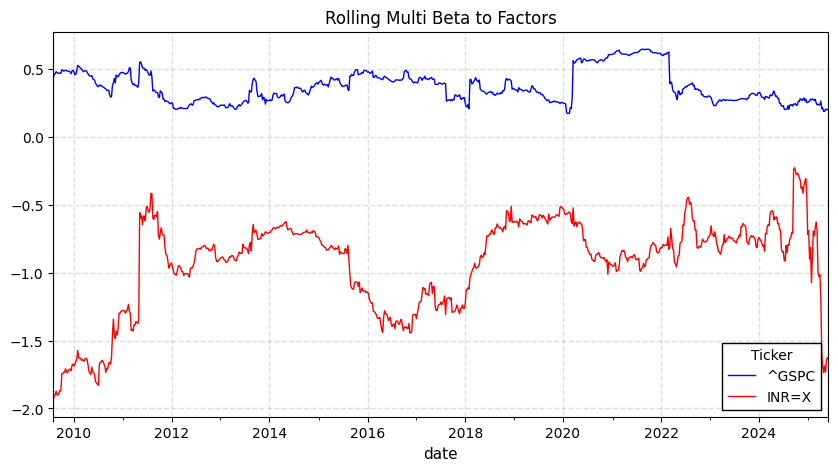

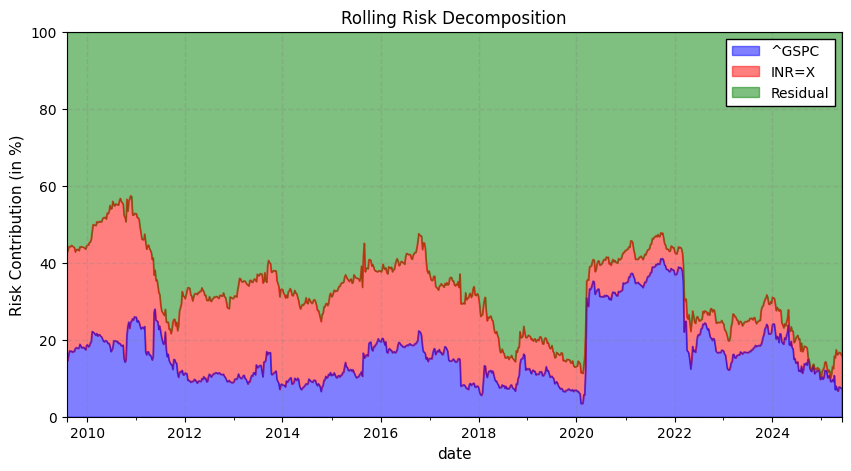

In [25]:
qt.backtest.risk_report(ret.iloc[:, :1], factors=ret.iloc[:, 1:3], window=104)